Objective: Investigate are the drivers of medical charges

In [24]:
# Import librarys
import pandas as pd, numpy as np
import re, os, sys, time, shutil
import matplotlib.pyplot as plt

In [2]:
# Import file
medcosts = pd.read_csv("medical_cost.csv")

In [3]:
# Check head of the data
medcosts.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Chek sample of the data
medcosts.sample(5)

,Id,age,sex,bmi,children,smoker,region,charges
216,217,53,female,26.600,0,no,northwest,10355.64100
519,520,31,male,30.875,0,no,northeast,3857.75925
1075,1076,32,female,29.590,1,no,southeast,4562.84210
1025,1026,21,female,34.600,0,no,southwest,2020.17700
1102,1103,29,male,38.940,1,no,southeast,3471.40960


In [5]:
# Check shape of data
medcosts.shape

(1338, 8)

In [6]:
# Check uniquiness of data
medcosts.nunique()

Id          1338
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
# Check the data type
medcosts.dtypes

Id            int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
medcosts.isna().sum()

Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# Describe the data
medcosts.describe(include='all')

,Id,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,NaN,2,NaN,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,NaN,676,NaN,NaN,1064,364,NaN
mean,669.500000,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,386.391641,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,1.000000,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,335.250000,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,669.500000,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,1003.750000,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [12]:
# Check for normal distribution
import scipy.stats as scistats

In [11]:
# Get column names
column_names = medcosts.columns.tolist()

age is not normally distributed




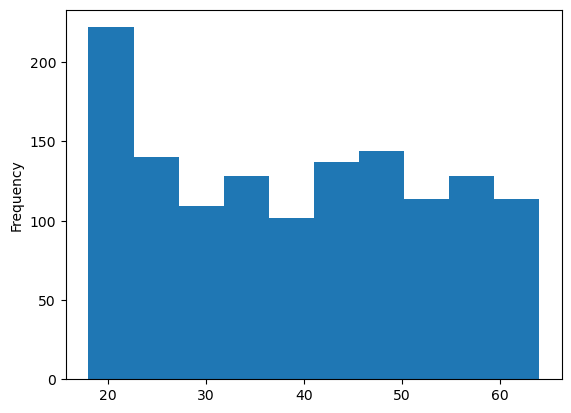

bmi is not normally distributed




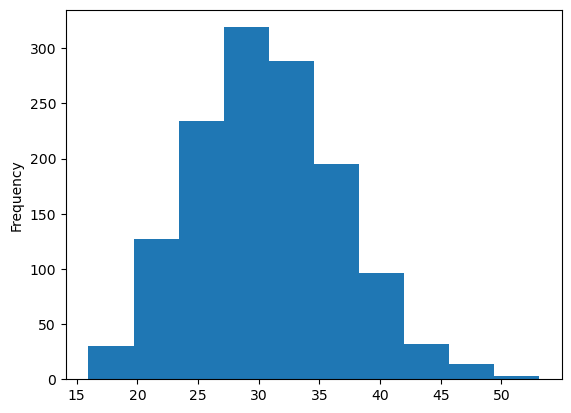

children is not normally distributed




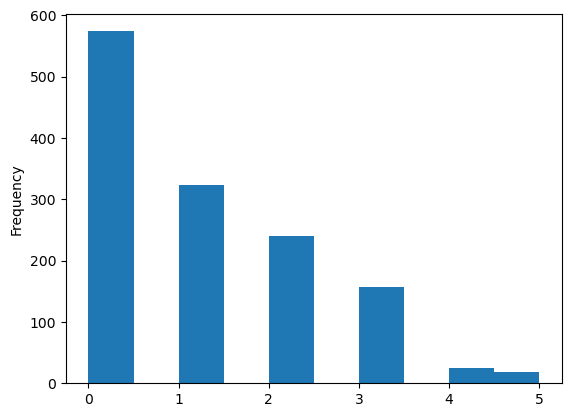

charges is not normally distributed




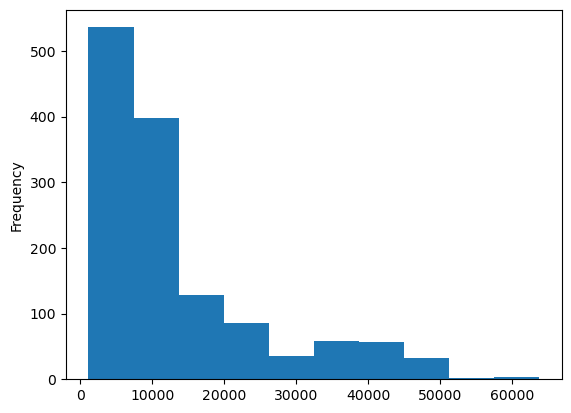

In [33]:
#Check for normality
for i in column_names:
    if i =='Id':
        continue
    if medcosts[i].dtype in ['int64','float64']:
        normal_test_check = scistats.normaltest(medcosts[i])
        shapiro_test_check = scistats.shapiro(medcosts[i])
        if normal_test_check[1] <= 0.05 or  shapiro_test_check[1] <= 0.05:
            print (i + " is not normally distributed\n\n")
            medcosts[i].plot(kind='hist')
            plt.show()

In [34]:
# Check for corrleation first pearson
medcosts.corr().style.background_gradient(cmap='coolwarm')

/var/folders/kd/6_9t3jcx0t15fhk_23f_8v3w0000gn/T/ipykernel_78371/2457589764.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  medcosts.corr().style.background_gradient(cmap='coolwarm')


,Id,age,bmi,children,charges
Id,1.000000,-0.031467,-0.036169,0.025221,-0.003373
age,-0.031467,1.000000,0.109272,0.042469,0.299008
bmi,-0.036169,0.109272,1.000000,0.012759,0.198341
children,0.025221,0.042469,0.012759,1.000000,0.067998
charges,-0.003373,0.299008,0.198341,0.067998,1.000000


In [35]:
# Check for corrleation now spearman
medcosts.corr('spearman').style.background_gradient(cmap='coolwarm')

/var/folders/kd/6_9t3jcx0t15fhk_23f_8v3w0000gn/T/ipykernel_78371/3626440356.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  medcosts.corr('spearman').style.background_gradient(cmap='coolwarm')


,Id,age,bmi,children,charges
Id,1.000000,-0.030749,-0.046035,0.025169,0.000418
age,-0.030749,1.000000,0.107736,0.056992,0.534392
bmi,-0.046035,0.107736,1.000000,0.015607,0.119396
children,0.025169,0.056992,0.015607,1.000000,0.133339
charges,0.000418,0.534392,0.119396,0.133339,1.000000


In [36]:
# Check variance
medcosts.var()

/var/folders/kd/6_9t3jcx0t15fhk_23f_8v3w0000gn/T/ipykernel_78371/1288291683.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medcosts.var()


Id          1.492985e+05
age         1.974014e+02
bmi         3.718788e+01
children    1.453213e+00
charges     1.466524e+08
dtype: float64

In [38]:
# Check covariance
medcosts.cov()

/var/folders/kd/6_9t3jcx0t15fhk_23f_8v3w0000gn/T/ipykernel_78371/996581020.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  medcosts.cov()


,Id,age,bmi,children,charges
Id,149298.500000,-170.829095,-85.224706,11.747569,-1.578122e+04
age,-170.829095,197.401387,9.362337,0.719303,5.087480e+04
bmi,-85.224706,9.362337,37.187884,0.093795,1.464730e+04
children,11.747569,0.719303,0.093795,1.453213,9.926742e+02
charges,-15781.223645,50874.802298,14647.304426,992.674197,1.466524e+08


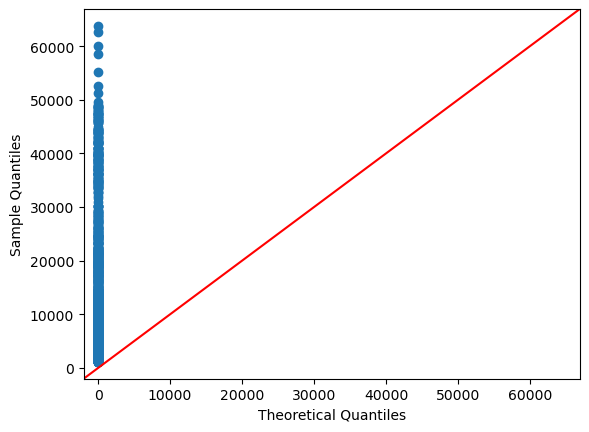

In [37]:
# Since target variable is continuous, will visualize using Q-Q plot
import statsmodels.api as sm
fig = sm.qqplot(medcosts['charges'], line='45')
plt.show()

<Axes: >

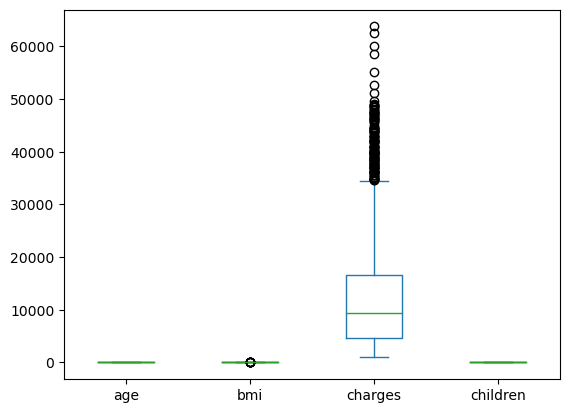

In [40]:
# Create a boxplot
medcosts[['age','bmi','charges','children']].plot(kind='box')

In [44]:
# Chcecking Durbin-Watson test must be between 1.5 and 2.5
from statsmodels.formula.api import ols

#fit multiple linear regression model
model = ols('charges ~ age + bmi + children + smoker + region', data=medcosts.drop('Id',axis=1)).fit()

#view model summary
print(model.summary())

from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:08:26   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.199e+04    

2.0889642258971737

Check assumption of regression 
		Assumption 1: There is a Linear Relationship between the Independent and Dependent Variables. (?)
		Assumption 2: No Multicollinearity (no high correlation between your independent variables) (Pass)
		Assumption 3: No Autocorrelation ( mut not fail Durbin-Watson test)  (Pass)
		Assumption 4: Residuals should be Homoskedastic
			Homoskedasticity is the idea that your residual plot should show an even and random pattern across all observations. (?)
		Assumption 5: All Independent Variables are Normally Distributed (Fail)

#### To start regression procecss we first want generate appropriate features

In [101]:
# Get dummies for columns and drop ID
medcosts2 = pd.get_dummies(medcosts, columns=['smoker','region','sex'])
medcosts2 = medcosts2.drop('Id',axis=1)

In [102]:
# Check the data frames
medcosts2.head()

,age,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,27.900,0,16884.92400,0,1,0,0,0,1,1,0
1,18,33.770,1,1725.55230,1,0,0,0,1,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0,0,0,1
4,32,28.880,0,3866.85520,1,0,0,1,0,0,0,1


In [103]:
medcosts2.shape

(1338, 12)

In [104]:
medcosts2.isna().sum()

age                 0
bmi                 0
children            0
charges             0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
sex_female          0
sex_male            0
dtype: int64

In [105]:
# Check correlaiton one more time


In [106]:
# Check for corrleation first pearson
medcosts2.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
age,1.000000,0.109272,0.042469,0.299008,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016,0.020856,-0.020856
bmi,0.109272,1.000000,0.012759,0.198341,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205,-0.046371,0.046371
children,0.042469,0.012759,1.000000,0.067998,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914,-0.017163,0.017163
charges,0.299008,0.198341,0.067998,1.000000,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210,-0.057292,0.057292
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945,0.076185,-0.076185
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945,-0.076185,0.076185
region_northeast,0.002475,-0.138156,-0.022808,0.006349,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177,0.002425,-0.002425
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829,0.011156,-0.011156
region_southeast,-0.011642,0.270025,-0.023066,0.073982,-0.068498,0.068498,-0.345561,-0.346265,1.000000,-0.346265,-0.017117,0.017117
region_southwest,0.010016,-0.006205,0.021914,-0.043210,0.036945,-0.036945,-0.320177,-0.320829,-0.346265,1.000000,0.004184,-0.004184


In [107]:
# Check for corrleation now spearman
medcosts2.corr('spearman',numeric_only=True).style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
age,1.000000,0.107736,0.056992,0.534392,0.025210,-0.025210,-0.000149,0.002683,-0.015273,0.013315,0.020809,-0.020809
bmi,0.107736,1.000000,0.015607,0.119396,-0.002203,0.002203,-0.133115,-0.127168,0.249037,0.001710,-0.044802,0.044802
children,0.056992,0.015607,1.000000,0.133339,-0.016583,0.016583,-0.025690,0.034465,-0.019531,0.011466,-0.015589,0.015589
charges,0.534392,0.119396,0.133339,1.000000,-0.663460,0.663460,0.046109,-0.021634,0.017275,-0.042354,-0.009490,0.009490
smoker_no,0.025210,-0.002203,-0.016583,-0.663460,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945,0.076185,-0.076185
smoker_yes,-0.025210,0.002203,0.016583,0.663460,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945,-0.076185,0.076185
region_northeast,-0.000149,-0.133115,-0.025690,0.046109,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177,0.002425,-0.002425
region_northwest,0.002683,-0.127168,0.034465,-0.021634,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829,0.011156,-0.011156
region_southeast,-0.015273,0.249037,-0.019531,0.017275,-0.068498,0.068498,-0.345561,-0.346265,1.000000,-0.346265,-0.017117,0.017117
region_southwest,0.013315,0.001710,0.011466,-0.042354,0.036945,-0.036945,-0.320177,-0.320829,-0.346265,1.000000,0.004184,-0.004184


In [108]:
# See highly correlated values calculating VIF
# To calculate VIF need to remove perfect correlated columsn

medcosts2 = medcosts2.drop(['smoker_yes','sex_male'], axis=1)

In [109]:

vifs = pd.Series(np.linalg.inv(medcosts2.corr(numeric_only=True).values).diagonal(), \
                 index=medcosts2.corr(numeric_only=True).index)

In [110]:
vifs

age                 1.373348e+00
bmi                 1.223757e+00
children            1.013005e+00
charges             4.014662e+00
smoker_no           3.549468e+00
region_northeast    2.694901e+15
region_northwest    2.700553e+15
region_southeast    2.908173e+15
region_southwest    2.700553e+15
sex_female          1.009018e+00
dtype: float64

In [112]:
# High VIF but do a check on smoker as well
medcosts2_vif_check = pd.get_dummies(medcosts, columns=['smoker','region','sex']).drop('Id',axis=1)

In [113]:
vifs_smk = pd.Series(np.linalg.inv(medcosts2_vif_check.corr(numeric_only=True).values).diagonal(), \
                 index=medcosts2_vif_check.corr(numeric_only=True).index)
vifs_smk

age                 1.373348e+00
bmi                 1.223757e+00
children            1.013005e+00
charges             4.014662e+00
smoker_no          -1.050573e+16
smoker_yes         -1.098554e+16
region_northeast    7.260583e+14
region_northwest    7.275810e+14
region_southeast    7.835178e+14
region_southwest    7.275810e+14
sex_female         -1.290037e+15
sex_male           -1.290037e+15
dtype: float64

In [114]:
# VIF High only because of factors that are linked together
# Check counts on regions and rop 1 
# got from https://stackoverflow.com/a/43306595
medcosts2[['region_northeast','region_southeast','region_northwest','region_southwest']]\
.apply(pd.value_counts).fillna(0)

,region_northeast,region_southeast,region_northwest,region_southwest
0,1014,974,1013,1013
1,324,364,325,325


In [115]:
# Drop and check vif after removing Northeast 
medcosts2_no_ne = medcosts2.drop('region_northeast',axis=1)
vifs = pd.Series(np.linalg.inv(medcosts2_no_ne.corr(numeric_only=True).values).diagonal(), \
                 index=medcosts2_no_ne.corr(numeric_only=True).index)

In [116]:
vifs

age                 1.373348
bmi                 1.223757
children            1.013005
charges             4.014662
smoker_no           3.549468
region_northwest    1.519451
region_southeast    1.658042
region_southwest    1.534055
sex_female          1.009018
dtype: float64

In [117]:
# VIFs make sense, will remove north east
medcosts3 = medcosts2.drop('region_northeast',axis=1)

In [118]:
# Got loop from https://stackoverflow.com/a/57780932
import statsmodels.api as sm
from statsmodels.formula.api import ols
keys = []
tables = []
for variable in medcosts3.columns:
    model = ols('charges ~ {}'.format(variable), data=medcosts3).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    keys.append(variable)
    tables.append(anova_table)

df_anova = pd.concat(tables, keys=keys, axis=0)

In [119]:
df_anova.head(18)

sum_sq      df             F  \
age              age               1.753019e+10     1.0  1.311740e+02   
                 Residual          1.785440e+11  1336.0           NaN   
bmi              bmi               7.713391e+09     1.0  5.470931e+01   
                 Residual          1.883608e+11  1336.0           NaN   
children         children          9.065999e+08     1.0  6.206037e+00   
                 Residual          1.951676e+11  1336.0           NaN   
charges          charges           1.960742e+11     1.0  2.364066e+34   
                 Residual          1.108070e-20  1336.0           NaN   
smoker_no        smoker_no         1.215199e+11     1.0  2.177615e+03   
                 Residual          7.455432e+10  1336.0           NaN   
region_northwest region_northwest  3.122282e+08     1.0  2.130837e+00   
                 Residual          1.957620e+11  1336.0           NaN   
region_southeast region_southeast  1.073167e+09     1.0  7.352531e+00   
                 Residual          1.950011e+11  1336.0           NaN   
region_southwest region_southwest  3.660915e+08     1.0  2.499121e+00   
                 Residual          1.957081e+11  1336.0           NaN   
sex_female       sex_female        6.435902e+08     1.0  4.399702e+00   
                 Residual          1.954306e+11  1336.0           NaN   

                                          PR(>F)  
age              age                4.886693e-29  
                 Residual                    NaN  
bmi              bmi                2.459086e-13  
                 Residual                    NaN  
children         children           1.285213e-02  
                 Residual                    NaN  
charges          charges            0.000000e+00  
                 Residual                    NaN  
smoker_no        smoker_no         8.271436e-283  
                 Residual                    NaN  
region_northwest region_northwest   1.445970e-01  
                 Residual                    NaN  
region_southeast region_southeast   6.782699e-03  
                 Residual                    NaN  
region_southwest region_southwest   1.141466e-01  
                 Residual                    NaN  
sex_female       sex_female         3.613272e-02  
                 Residual                    NaN

age vs charges


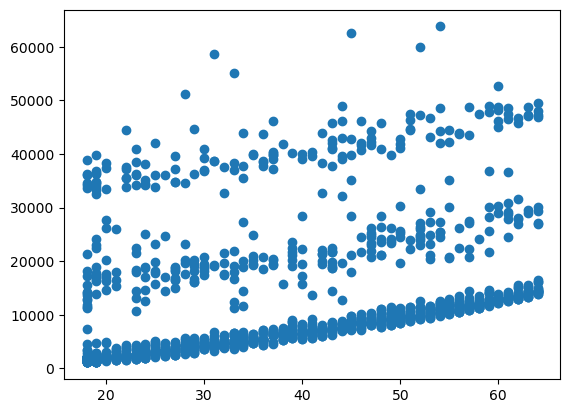

bmi vs charges


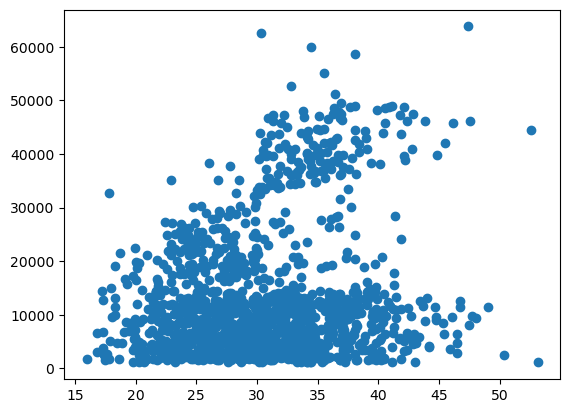

children vs charges


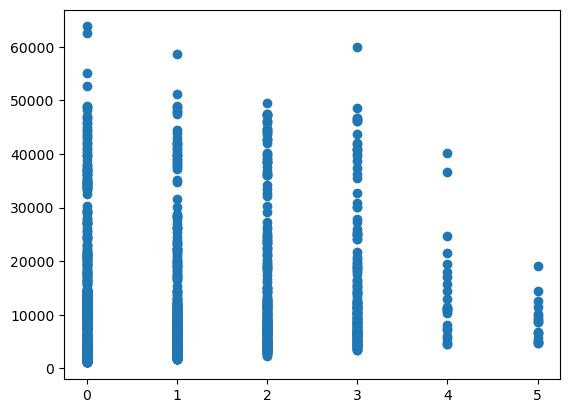

smoker_no vs charges


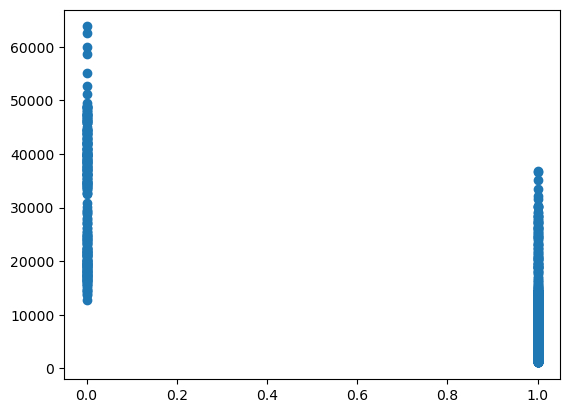

region_northwest vs charges


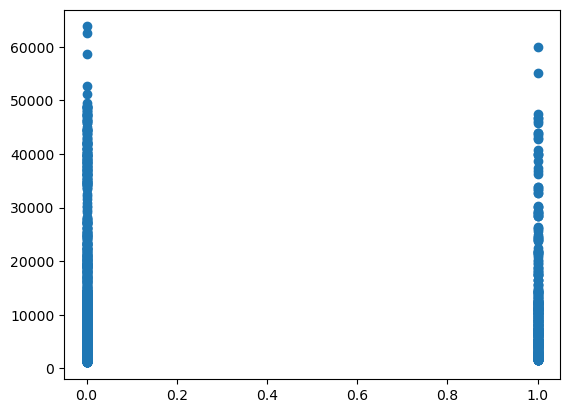

region_southeast vs charges


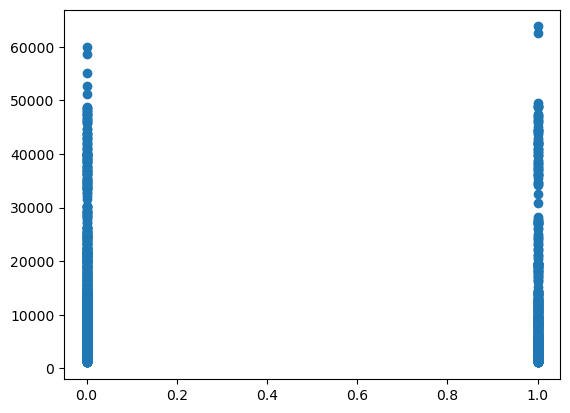

region_southwest vs charges


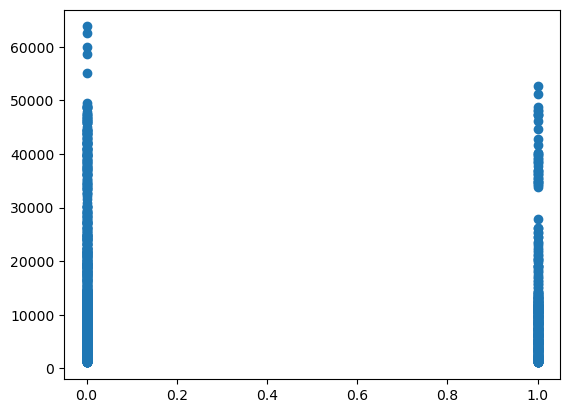

sex_female vs charges


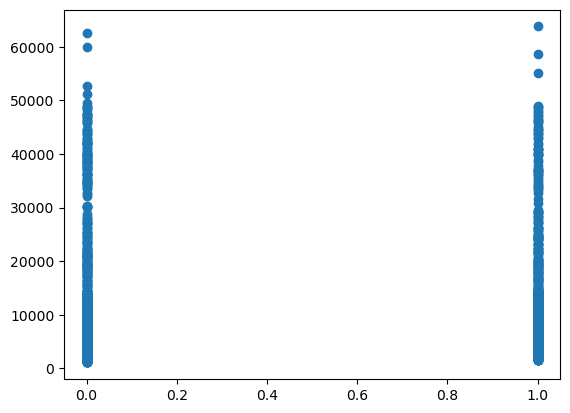

In [120]:
# Give check on linear relationship
for i in medcosts3.columns.tolist():
    if i == 'charges':
        continue
    else:
        print (i + " vs charges")
        plt.scatter(medcosts3[i], medcosts3['charges'])
        plt.show()

In [146]:
# To make sure that the data can meet regresssion tests goign to scale
# Scaling trick from https://proclusacademy.com/blog/robust-scaler-outliers/
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

# calculate median and IQR  
robust_scaler.fit(medcosts3)

# scale all data points using median and IQR
medcosts3_5 = robust_scaler.transform(medcosts3)

In [147]:
# Use 3_5 as an in in betweeen for the data
medcosts4 = pd.DataFrame(medcosts3_5, columns=medcosts3.columns.tolist())

In [148]:
medcosts4.head()

,age,bmi,children,charges,smoker_no,region_northwest,region_southeast,region_southwest,sex_female
0,-0.833333,-0.297708,-0.5,0.630515,-1.0,0.0,0.0,1.0,1.0
1,-0.875000,0.401310,0.0,-0.643422,0.0,0.0,1.0,0.0,0.0
2,-0.458333,0.309616,1.0,-0.414515,0.0,0.0,1.0,0.0,0.0
3,-0.250000,-0.916344,-0.5,1.059062,0.0,1.0,0.0,0.0,0.0
4,-0.291667,-0.181006,-0.5,-0.463475,0.0,1.0,0.0,0.0,0.0


In [149]:
medcosts4.describe()

,age,bmi,children,charges,smoker_no,region_northwest,region_southeast,region_southwest,sex_female
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.008626,0.031366,0.047459,0.326766,-0.204783,0.242900,0.272048,0.242900,0.494768
std,0.585415,0.726191,0.602746,1.017680,0.403694,0.428995,0.445181,0.428995,0.500160
min,-0.875000,-1.719559,-0.500000,-0.694153,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.500000,-0.488687,-0.500000,-0.390075,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.511313,0.500000,0.609925,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.041667,2.706758,2.000000,4.570597,0.000000,1.000000,1.000000,1.000000,1.000000


age vs charges


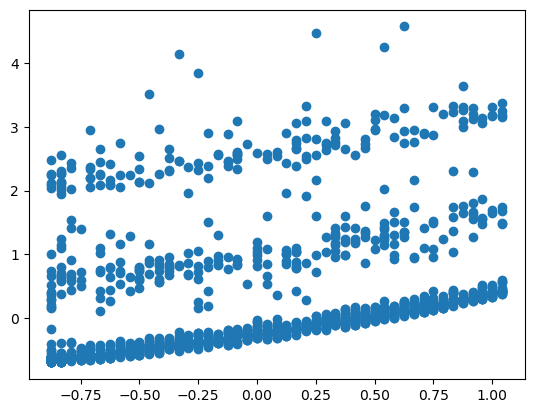

bmi vs charges


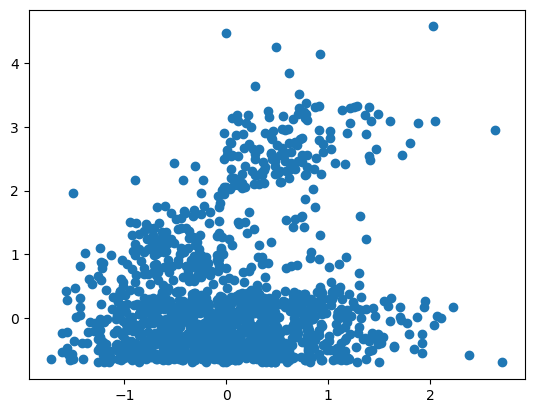

children vs charges


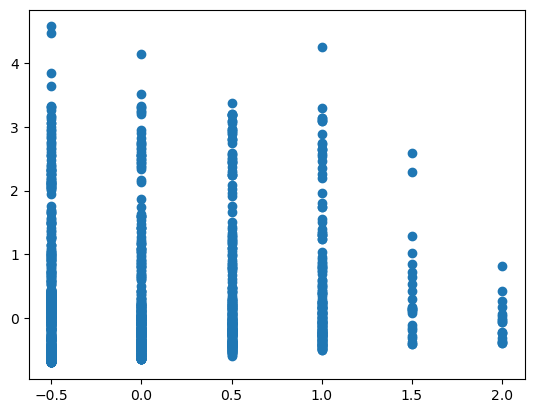

smoker_no vs charges


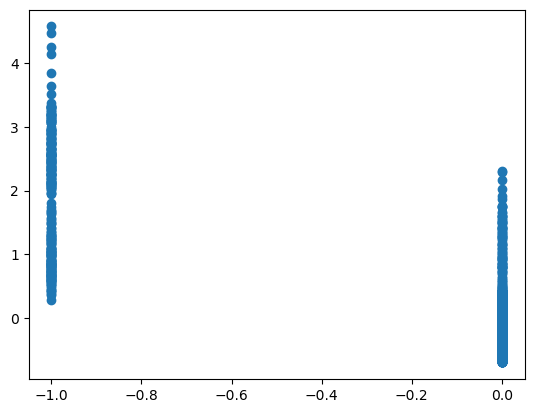

region_northwest vs charges


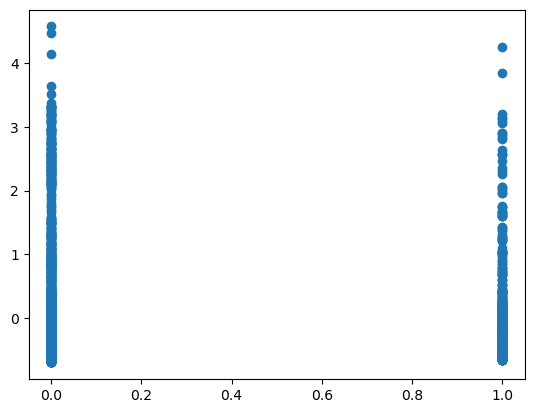

region_southeast vs charges


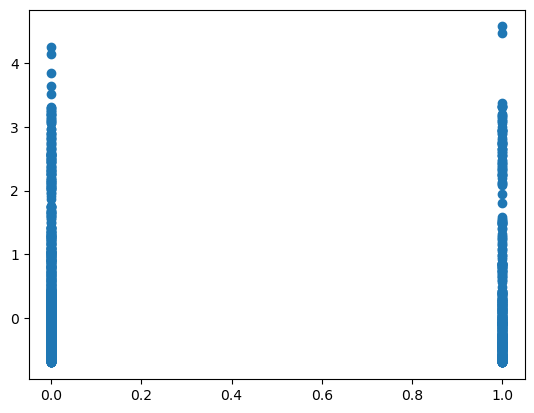

region_southwest vs charges


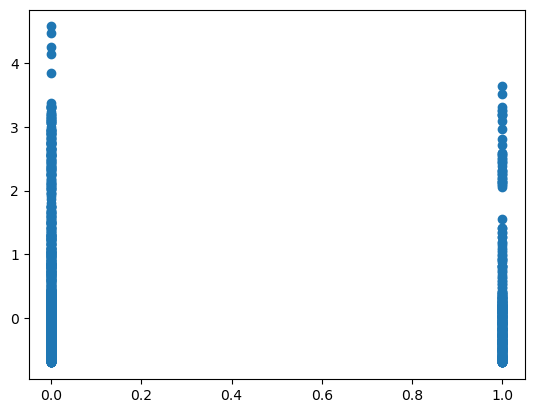

sex_female vs charges


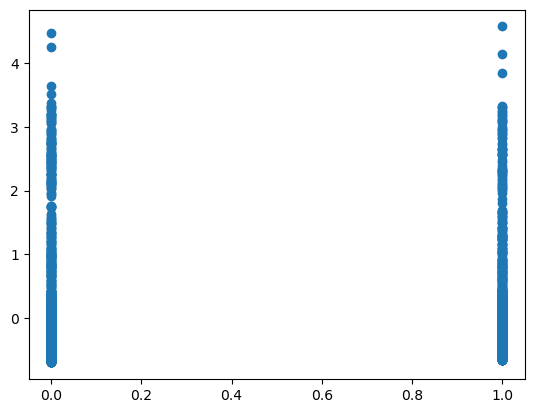

In [150]:
# Give check on linear relationship
for i in medcosts4.columns.tolist():
    if i == 'charges':
        continue
    else:
        print (i + " vs charges")
        plt.scatter(medcosts4[i], medcosts4['charges'])
        plt.show()

In [ ]:
# Will take the suggestion of https://towardsdatascience.com/what-happens-when-you-break-the-assumptions-of-linear-regression-f78f2fe90f3a.
# Making a linear regression wiht the scaled data

In [153]:
# make test train validate data
random_state = 1234
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(medcosts4.drop('charges',axis=1), \
                                                    medcosts4['charges'], test_size=0.3, random_state=random_state)

In [154]:
# Validate
X_test, X_val, Y_test, Y_val = train_test_split(X_test, \
                                                    Y_test, test_size=0.3, random_state=random_state)

In [156]:
# https://www.statsmodels.org/stable/regression.html
# Fit and summarize OLS model
mod = sm.OLS(Y_train, X_train)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.777
Model:                            OLS   Adj. R-squared (uncentered):              0.775
Method:                 Least Squares   F-statistic:                              404.7
Date:                Mon, 21 Aug 2023   Prob (F-statistic):                   2.05e-296
Time:                        15:53:39   Log-Likelihood:                         -695.02
No. Observations:                 936   AIC:                                      1406.
Df Residuals:                     928   BIC:                                      1445.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

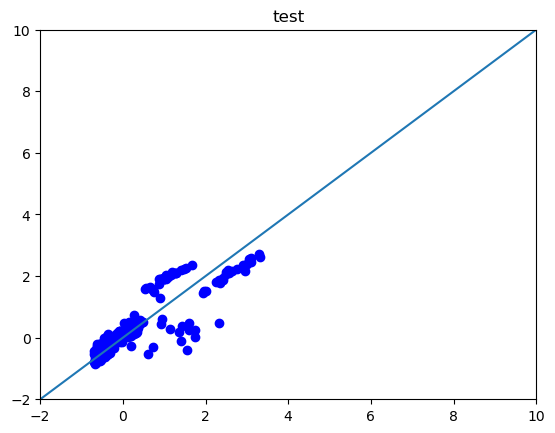

In [419]:
# checking predicted vs actual
# Must put in res.params before data frame
Y_pred_OLS = mod.predict(res.params, X_test)


import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(y_test,y_pred, color='blue')
    # from https://stackoverflow.com/questions/59815100/add-the-y-x-line-in-a-scatter-graph
    plt.xlim((-2, 10)) # restricts x axis 
    plt.ylim((-2, 10)) # restricts y axis from
    plt.plot([-2, 10], [-2, 10]) # plots line y = x #
    plt.title(regressorName)
    plt.show()
    return



plotGraph(Y_test, Y_pred_OLS, "test")

In [ ]:
# Checking the data visually it is not normal.

In [177]:
# Buliding final dataset SINCE WE DON't need to reduce the dataframe further
medcosts5 = medcosts4.copy()

In [180]:
# Describe the outcome data even though it's normalized because we want to see what will work and not work
medcosts5['charges'].describe()

count    1338.000000
mean        0.326766
std         1.017680
min        -0.694153
25%        -0.390075
50%         0.000000
75%         0.609925
max         4.570597
Name: charges, dtype: float64

In [ ]:
# In scaled data, charges can be negative, in the non-scaled, charges can only be positive
# Keep this in mind for interpreation

In [178]:
# make test train validate data again running it again with similar dataset for practice
random_state = 1234
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(medcosts5.drop('charges',axis=1), \
                                                    medcosts5['charges'], test_size=0.3, random_state=random_state)

In [266]:
# Validate
X_test, X_val, Y_test, Y_val = train_test_split(X_test, \
                                                    Y_test, test_size=0.25, random_state=random_state)

In [183]:
# Standard models 
# import packages for machine learning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import f1_score, roc_curve, roc_auc_score,confusion_matrix,precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# import catboost

In [212]:
pipe = Pipeline([('model', LinearRegression())])

In [213]:
# Create paramters

pipe_parameters = [{
    'model': [LinearRegression()]},
    {'model': [Ridge()],
    'model__alpha': [i for i in range (0,100)],
    'model__random_state': [random_state]},
    {'model': [Lasso()],
    'model__alpha': [i for i in range (0,100)],
    'model__random_state': [random_state]},
    {'model': [ElasticNet()],
    'model__alpha': [i for i in range (0,100)],
    'model__random_state': [random_state]},
    {'model': [DecisionTreeRegressor()],
    'model__criterion': ['friedman_mse', 'squared_error', 'absolute_error'],
    'model__max_depth': [i for i in range (0,21)],
    'model__random_state': [random_state]},
    {'model': [RandomForestRegressor()],
    'model__criterion': ['friedman_mse', 'squared_error', 'absolute_error'],
    'model__max_depth': [i for i in range (0,21)],
    'model__random_state': [random_state],
    'model__n_estimators': [i for i in range (100,300, 10)]},
    {'model': [ExtraTreesRegressor()],
    'model__criterion': ['friedman_mse', 'squared_error', 'absolute_error'],
    'model__max_depth': [i for i in range (0,21)],
    'model__random_state': [random_state],
    'model__n_estimators': [i for i in range (100,300, 10)]},
    {'model': [XGBRegressor()],
    'model__objective': ['reg:squarederror', 'reg:squaredlogerror', 'reg:absoluteerror'],
    'model__max_depth': [i for i in range (0,21)],
    'model__random_state': [random_state],
    'model__n_estimators': [i for i in range (100,300, 10)]},
        {'model': [LGBMRegressor()],
     'model__boosting_type': ['gbdt','dart'],       
    'model__max_depth': [i for i in range (0,21)],
    'model__random_state': [random_state],
    'model__n_estimators': [i for i in range (100,300, 10)]},
    ]

In [214]:
# Use random search to find potential best paramters
randomsearch = RandomizedSearchCV(pipe, pipe_parameters, scoring='neg_mean_squared_error', \
                                  random_state=random_state, n_iter=15)
randomsearch.fit(X_train, Y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('model', LinearRegression())]),
                   n_iter=15,
                   param_distributions=[{'model': [LinearRegression()]},
                                        {'model': [Ridge()],
                                         'model__alpha': [0, 1, 2, 3, 4, 5, 6,
                                                          7, 8, 9, 10, 11, 12,
                                                          13, 14, 15, 16, 17,
                                                          18, 19, 20, 21, 22,
                                                          23, 24, 25, 26, 27,
                                                          28, 29, ...],
                                         'model__random_state': [1234]},
                                        {'model': [Lasso()],
                                         'model__alpha': [0, 1, 2, 3, 4, 5, 6,
                                                          7, 8, 9, 10, 11, 1...
                                         'model__random_state': [1234]},
                                        {'model': [LGBMRegressor()],
                                         'model__boosting_type': ['gbdt',
                                                                  'dart'],
                                         'model__max_depth': [0, 1, 2, 3, 4, 5,
                                                              6, 7, 8, 9, 10,
                                                              11, 12, 13, 14,
                                                              15, 16, 17, 18,
                                                              19, 20],
                                         'model__n_estimators': [100, 110, 120,
                                                                 130, 140, 150,
                                                                 160, 170, 180,
                                                                 190, 200, 210,
                                                                 220, 230, 240,
                                                                 250, 260, 270,
                                                                 280, 290],
                                         'model__random_state': [1234]}],
                   random_state=1234, scoring='neg_mean_squared_error')

In [215]:
randomsearch.best_params_

{'model__random_state': 1234,
 'model__n_estimators': 240,
 'model__max_depth': 5,
 'model__criterion': 'absolute_error',
 'model': RandomForestRegressor(criterion='absolute_error', max_depth=5, n_estimators=240,
                       random_state=1234)}

In [216]:
# Create paramters again removing Random Forest

pipe_parameters = [{
    'model': [LinearRegression()]},
    {'model': [Ridge()],
    'model__alpha': [i for i in range (0,100)],
    'model__random_state': [random_state]},
    {'model': [Lasso()],
    'model__alpha': [i for i in range (0,100)],
    'model__random_state': [random_state]},
    {'model': [ElasticNet()],
    'model__alpha': [i for i in range (0,100)],
    'model__random_state': [random_state]},
    {'model': [DecisionTreeRegressor()],
    'model__criterion': ['friedman_mse', 'squared_error', 'absolute_error'],
    'model__max_depth': [i for i in range (0,21)],
    'model__random_state': [random_state]},
    {'model': [ExtraTreesRegressor()],
    'model__criterion': ['friedman_mse', 'squared_error', 'absolute_error'],
    'model__max_depth': [i for i in range (0,21)],
    'model__random_state': [random_state],
    'model__n_estimators': [i for i in range (100,300, 10)]},
    {'model': [XGBRegressor()],
    'model__objective': ['reg:squarederror', 'reg:squaredlogerror', 'reg:absoluteerror'],
    'model__max_depth': [i for i in range (0,21)],
    'model__random_state': [random_state],
    'model__n_estimators': [i for i in range (100,300, 10)]},
        {'model': [LGBMRegressor()],
     'model__boosting_type': ['gbdt','dart'],       
    'model__max_depth': [i for i in range (0,21)],
    'model__random_state': [random_state],
    'model__n_estimators': [i for i in range (100,300, 10)]},
    ]

In [217]:
# Use random search to find potential 2nd best paramters
randomsearch2 = RandomizedSearchCV(pipe, pipe_parameters, scoring='neg_mean_squared_error', \
                                  random_state=random_state, n_iter=15)
randomsearch2.fit(X_train, Y_train)
# Use random search to find potential best paramters
randomsearch2

RandomizedSearchCV(estimator=Pipeline(steps=[('model', LinearRegression())]),
                   n_iter=15,
                   param_distributions=[{'model': [LinearRegression()]},
                                        {'model': [Ridge()],
                                         'model__alpha': [0, 1, 2, 3, 4, 5, 6,
                                                          7, 8, 9, 10, 11, 12,
                                                          13, 14, 15, 16, 17,
                                                          18, 19, 20, 21, 22,
                                                          23, 24, 25, 26, 27,
                                                          28, 29, ...],
                                         'model__random_state': [1234]},
                                        {'model': [Lasso()],
                                         'model__alpha': [0, 1, 2, 3, 4, 5, 6,
                                                          7, 8, 9, 10, 11, 1...
                                         'model__random_state': [1234]},
                                        {'model': [LGBMRegressor()],
                                         'model__boosting_type': ['gbdt',
                                                                  'dart'],
                                         'model__max_depth': [0, 1, 2, 3, 4, 5,
                                                              6, 7, 8, 9, 10,
                                                              11, 12, 13, 14,
                                                              15, 16, 17, 18,
                                                              19, 20],
                                         'model__n_estimators': [100, 110, 120,
                                                                 130, 140, 150,
                                                                 160, 170, 180,
                                                                 190, 200, 210,
                                                                 220, 230, 240,
                                                                 250, 260, 270,
                                                                 280, 290],
                                         'model__random_state': [1234]}],
                   random_state=1234, scoring='neg_mean_squared_error')

In [218]:
randomsearch2.best_params_

{'model__random_state': 1234,
 'model__n_estimators': 240,
 'model__max_depth': 9,
 'model__criterion': 'absolute_error',
 'model': ExtraTreesRegressor(criterion='absolute_error', max_depth=9, n_estimators=240,
                     random_state=1234)}

In [219]:
# Create paramters again removing Random Forest and ExtraTreesRegressor

pipe_parameters = [{
    'model': [LinearRegression()]},
    {'model': [Ridge()],
    'model__alpha': [i for i in range (0,100)],
    'model__random_state': [random_state]},
    {'model': [Lasso()],
    'model__alpha': [i for i in range (0,100)],
    'model__random_state': [random_state]},
    {'model': [ElasticNet()],
    'model__alpha': [i for i in range (0,100)],
    'model__random_state': [random_state]},
    {'model': [DecisionTreeRegressor()],
    'model__criterion': ['friedman_mse', 'squared_error', 'absolute_error'],
    'model__max_depth': [i for i in range (0,21)],
    'model__random_state': [random_state]},
    {'model': [XGBRegressor()],
    'model__objective': ['reg:squarederror', 'reg:squaredlogerror', 'reg:absoluteerror'],
    'model__max_depth': [i for i in range (0,21)],
    'model__random_state': [random_state],
    'model__n_estimators': [i for i in range (100,300, 10)]},
        {'model': [LGBMRegressor()],
     'model__boosting_type': ['gbdt','dart'],       
    'model__max_depth': [i for i in range (0,21)],
    'model__random_state': [random_state],
    'model__n_estimators': [i for i in range (100,300, 10)]},
    ]

In [220]:
# Use random search to find potential 2nd best paramters
randomsearch3 = RandomizedSearchCV(pipe, pipe_parameters, scoring='neg_mean_squared_error', \
                                  random_state=random_state, n_iter=15)
randomsearch3.fit(X_train, Y_train)
# Use random search to find potential best paramters
randomsearch3

RandomizedSearchCV(estimator=Pipeline(steps=[('model', LinearRegression())]),
                   n_iter=15,
                   param_distributions=[{'model': [LinearRegression()]},
                                        {'model': [Ridge()],
                                         'model__alpha': [0, 1, 2, 3, 4, 5, 6,
                                                          7, 8, 9, 10, 11, 12,
                                                          13, 14, 15, 16, 17,
                                                          18, 19, 20, 21, 22,
                                                          23, 24, 25, 26, 27,
                                                          28, 29, ...],
                                         'model__random_state': [1234]},
                                        {'model': [Lasso()],
                                         'model__alpha': [0, 1, 2, 3, 4, 5, 6,
                                                          7, 8, 9, 10, 11, 1...
                                        {'model': [LGBMRegressor(boosting_type='dart',
                                                                 max_depth=6,
                                                                 n_estimators=140,
                                                                 random_state=1234)],
                                         'model__boosting_type': ['gbdt',
                                                                  'dart'],
                                         'model__max_depth': [0, 1, 2, 3, 4, 5,
                                                              6, 7, 8, 9, 10,
                                                              11, 12, 13, 14,
                                                              15, 16, 17, 18,
                                                              19, 20],
                                         'model__n_estimators': [100, 110, 120,
                                                                 130, 140, 150,
                                                                 160, 170, 180,
                                                                 190, 200, 210,
                                                                 220, 230, 240,
                                                                 250, 260, 270,
                                                                 280, 290],
                                         'model__random_state': [1234]}],
                   random_state=1234, scoring='neg_mean_squared_error')

In [221]:
randomsearch3.best_params_

{'model__random_state': 1234,
 'model__n_estimators': 140,
 'model__max_depth': 6,
 'model__boosting_type': 'dart',
 'model': LGBMRegressor(boosting_type='dart', max_depth=6, n_estimators=140,
               random_state=1234)}

In [228]:
# Take the 3 best models and do grid search on them

grid_search_param_rf= [{'model': [RandomForestRegressor()],
    'model__criterion': ['friedman_mse', 'squared_error', 'absolute_error'],
    'model__max_depth': [i for i in range (2,7)],
    'model__random_state': [random_state],
    'model__n_estimators': [i for i in range (200,300, 10)]}]
grid_search_param_et= [    {'model': [ExtraTreesRegressor()],
    'model__criterion': ['friedman_mse', 'squared_error', 'absolute_error'],
    'model__max_depth': [i for i in range (7,12)],
    'model__random_state': [random_state],
    'model__n_estimators': [i for i in range (200,300, 10)]},]

grid_search_param_lg= [
{'model': [LGBMRegressor()],
     'model__boosting_type': ['gbdt','dart'],       
    'model__max_depth': [i for i in range (4,8)],
    'model__random_state': [random_state],
    'model__n_estimators': [i for i in range (100,200, 10)]}
]

In [229]:
# Running gridsaerch on the paramters 

In [230]:
grid_search_rf = GridSearchCV(pipe, grid_search_param_rf, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train,Y_train)

GridSearchCV(estimator=Pipeline(steps=[('model', LinearRegression())]),
             param_grid=[{'model': [RandomForestRegressor(max_depth=5,
                                                          n_estimators=200,
                                                          random_state=1234)],
                          'model__criterion': ['friedman_mse', 'squared_error',
                                               'absolute_error'],
                          'model__max_depth': [2, 3, 4, 5, 6],
                          'model__n_estimators': [200, 210, 220, 230, 240, 250,
                                                  260, 270, 280, 290],
                          'model__random_state': [1234]}],
             scoring='neg_mean_squared_error')

In [231]:
grid_search_rf.best_params_

{'model': RandomForestRegressor(max_depth=5, n_estimators=200, random_state=1234),
 'model__criterion': 'squared_error',
 'model__max_depth': 5,
 'model__n_estimators': 200,
 'model__random_state': 1234}

In [232]:
grid_search_et = GridSearchCV(pipe, grid_search_param_et, scoring='neg_mean_squared_error')
grid_search_et.fit(X_train,Y_train)

GridSearchCV(estimator=Pipeline(steps=[('model', LinearRegression())]),
             param_grid=[{'model': [ExtraTreesRegressor(max_depth=7,
                                                        n_estimators=200,
                                                        random_state=1234)],
                          'model__criterion': ['friedman_mse', 'squared_error',
                                               'absolute_error'],
                          'model__max_depth': [7, 8, 9, 10, 11],
                          'model__n_estimators': [200, 210, 220, 230, 240, 250,
                                                  260, 270, 280, 290],
                          'model__random_state': [1234]}],
             scoring='neg_mean_squared_error')

In [233]:
grid_search_et.best_params_

{'model': ExtraTreesRegressor(max_depth=7, n_estimators=200, random_state=1234),
 'model__criterion': 'squared_error',
 'model__max_depth': 7,
 'model__n_estimators': 200,
 'model__random_state': 1234}

In [234]:
grid_search_lg = GridSearchCV(pipe, grid_search_param_lg, scoring='neg_mean_squared_error')
grid_search_lg.fit(X_train,Y_train)

GridSearchCV(estimator=Pipeline(steps=[('model', LinearRegression())]),
             param_grid=[{'model': [LGBMRegressor(boosting_type='dart',
                                                  max_depth=4, n_estimators=190,
                                                  random_state=1234)],
                          'model__boosting_type': ['gbdt', 'dart'],
                          'model__max_depth': [4, 5, 6, 7],
                          'model__n_estimators': [100, 110, 120, 130, 140, 150,
                                                  160, 170, 180, 190],
                          'model__random_state': [1234]}],
             scoring='neg_mean_squared_error')

In [235]:
grid_search_lg.best_params_

{'model': LGBMRegressor(boosting_type='dart', max_depth=4, n_estimators=190,
               random_state=1234),
 'model__boosting_type': 'dart',
 'model__max_depth': 4,
 'model__n_estimators': 190,
 'model__random_state': 1234}

In [278]:
# Generate predictions for each model
pred_v_act_val = pd.DataFrame({'Val':Y_val.values})

In [279]:
type(pred_v_act_val)

pandas.core.frame.DataFrame

In [280]:
#Create validation samples
pred_v_act_val['rf'] = grid_search_rf.predict(X_val)
pred_v_act_val['et'] = grid_search_et.predict(X_val)
pred_v_act_val['lg'] = grid_search_lg.predict(X_val)

In [281]:
pred_v_act_val

,Val,rf,et,lg
0,-0.046804,0.055795,0.033533,0.018887
1,0.858244,1.081043,0.920208,1.026868
2,-0.261315,-0.157498,-0.143081,-0.154933
3,3.239261,3.049364,3.089169,2.997964
4,-0.259863,-0.177793,-0.137890,-0.183469
...,...,...,...,...
66,0.917242,0.853889,0.996866,0.654420
67,-0.156644,-0.043919,0.006670,-0.031673
68,-0.432126,-0.310800,-0.316718,-0.361823
69,-0.521866,-0.307004,-0.322477,-0.274817


In [286]:
# Check the RSME evlauation metrics since we tuned on that one
from sklearn.metrics import mean_squared_error,r2_score
print ("Random forest RSME: "+ str(mean_squared_error(pred_v_act_val['Val'], pred_v_act_val['rf'],squared=False)))
print ("Extra Trees RSME: "+ str(mean_squared_error(pred_v_act_val['Val'], pred_v_act_val['et'],squared=False)))
print ("Light GBM RSME: "+ str(mean_squared_error(pred_v_act_val['Val'], pred_v_act_val['lg'],squared=False)))



Random forest RSME: 0.3325761029491999
Extra Trees RSME: 0.32156277288135443
Light GBM RSME: 0.3462238961946595


In [288]:
# Check the R2 evlauation metrics since we tuned on that one
print ("Random forest R2: "+ str(r2_score(pred_v_act_val['Val'], pred_v_act_val['rf'])))
print ("Extra Trees R2: "+ str(r2_score(pred_v_act_val['Val'], pred_v_act_val['et'])))
print ("Light GBM R2: "+ str(r2_score(pred_v_act_val['Val'], pred_v_act_val['lg'])))

Random forest R2: 0.8859281205250915
Extra Trees R2: 0.8933580575451586
Light GBM R2: 0.8763737784839691


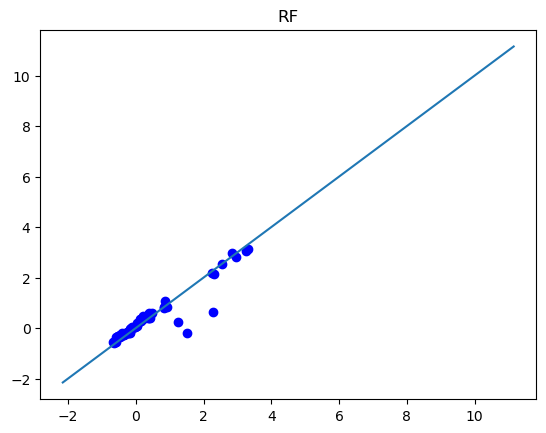

In [289]:
# Plot the graphcs
plotGraph(pred_v_act_val['Val'], pred_v_act_val['rf'], "RF")

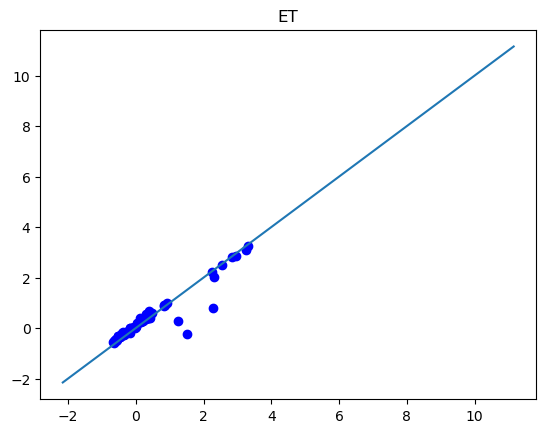

In [290]:
plotGraph(pred_v_act_val['Val'], pred_v_act_val['et'], "ET")

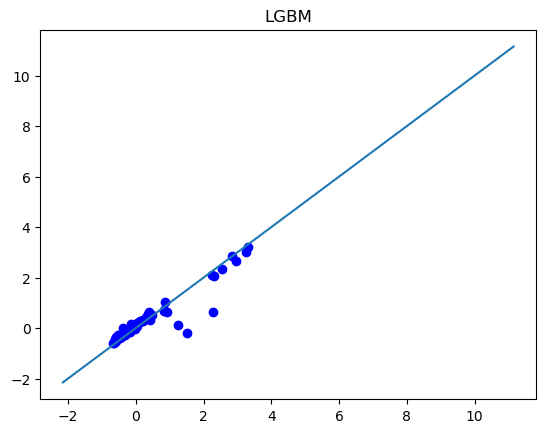

In [291]:
plotGraph(pred_v_act_val['Val'], pred_v_act_val['lg'], "LGBM")

In [ ]:
# Metrics look good will do another round of optimization

In [347]:
# Take the 3 best models and do grid search on them
# This time add in max features for random forest/extra trees and learning rate for LGBM
# Adjusting max features similar to what was said here: 
n_features = medcosts5.shape[1]-1 # To get all features minus target
grid_search_param_rf2= [{'model': [RandomForestRegressor()],
    'model__criterion': ['squared_error'],
    'model__max_features': [1, int(np.ceil(n_features/3)), int(np.ceil(np.log2(n_features)))\
                            , int(np.ceil(np.log(n_features))),int(np.ceil(np.sqrt(n_features)))],                   
    'model__max_depth': [i for i in range (2,7)],
    'model__random_state': [random_state],
    'model__n_estimators': [i for i in range (50,200, 10)]}]
grid_search_param_et2= [    {'model': [ExtraTreesRegressor()],
    'model__criterion': ['squared_error'],
    'model__max_features': [1, int(np.ceil(n_features/3)), int(np.ceil(np.log2(n_features)))\
                            , int(np.ceil(np.log(n_features))),int(np.ceil(np.sqrt(n_features)))],                   
    'model__max_depth': [i for i in range (3,7)],
    'model__random_state': [random_state],
    'model__n_estimators': [i for i in range (50,200, 10)]},]
grid_search_param_lg2= [
{'model': [LGBMRegressor()],
     'model__boosting_type': ['dart'],  
    'model__learning_rate': [0.1, 0.05, 0.3, 0.5, 0.01],  
    'model__max_depth': [i for i in range (1,4)],
    'model__random_state': [random_state],
    'model__n_estimators': [i for i in range (50,190, 10)]}
]

In [348]:
# Running gridsaerch on the paramters 

In [349]:
grid_search_rf2 = GridSearchCV(pipe, grid_search_param_rf2, scoring='neg_mean_squared_error')
grid_search_rf2.fit(X_train,Y_train)

GridSearchCV(estimator=Pipeline(steps=[('model', LinearRegression())]),
             param_grid=[{'model': [RandomForestRegressor(max_depth=6,
                                                          max_features=3,
                                                          n_estimators=110,
                                                          random_state=1234)],
                          'model__criterion': ['squared_error'],
                          'model__max_depth': [2, 3, 4, 5, 6],
                          'model__max_features': [1, 3, 3, 3, 3],
                          'model__n_estimators': [50, 60, 70, 80, 90, 100, 110,
                                                  120, 130, 140, 150, 160, 170,
                                                  180, 190],
                          'model__random_state': [1234]}],
             scoring='neg_mean_squared_error')

In [350]:
grid_search_rf2.best_params_

{'model': RandomForestRegressor(max_depth=6, max_features=3, n_estimators=110,
                       random_state=1234),
 'model__criterion': 'squared_error',
 'model__max_depth': 6,
 'model__max_features': 3,
 'model__n_estimators': 110,
 'model__random_state': 1234}

In [351]:
grid_search_et2 = GridSearchCV(pipe, grid_search_param_et2, scoring='neg_mean_squared_error')
grid_search_et2.fit(X_train,Y_train)

GridSearchCV(estimator=Pipeline(steps=[('model', LinearRegression())]),
             param_grid=[{'model': [ExtraTreesRegressor(max_depth=6,
                                                        max_features=3,
                                                        n_estimators=150,
                                                        random_state=1234)],
                          'model__criterion': ['squared_error'],
                          'model__max_depth': [3, 4, 5, 6],
                          'model__max_features': [1, 3, 3, 3, 3],
                          'model__n_estimators': [50, 60, 70, 80, 90, 100, 110,
                                                  120, 130, 140, 150, 160, 170,
                                                  180, 190],
                          'model__random_state': [1234]}],
             scoring='neg_mean_squared_error')

In [352]:
grid_search_et2.best_params_

{'model': ExtraTreesRegressor(max_depth=6, max_features=3, n_estimators=150,
                     random_state=1234),
 'model__criterion': 'squared_error',
 'model__max_depth': 6,
 'model__max_features': 3,
 'model__n_estimators': 150,
 'model__random_state': 1234}

In [353]:
grid_search_lg2 = GridSearchCV(pipe, grid_search_param_lg2, scoring='neg_mean_squared_error')
grid_search_lg2.fit(X_train,Y_train)

GridSearchCV(estimator=Pipeline(steps=[('model', LinearRegression())]),
             param_grid=[{'model': [LGBMRegressor(boosting_type='dart',
                                                  learning_rate=0.3,
                                                  max_depth=2, n_estimators=180,
                                                  random_state=1234)],
                          'model__boosting_type': ['dart'],
                          'model__learning_rate': [0.1, 0.05, 0.3, 0.5, 0.01],
                          'model__max_depth': [1, 2, 3],
                          'model__n_estimators': [50, 60, 70, 80, 90, 100, 110,
                                                  120, 130, 140, 150, 160, 170,
                                                  180],
                          'model__random_state': [1234]}],
             scoring='neg_mean_squared_error')

In [354]:
grid_search_lg2.best_params_

{'model': LGBMRegressor(boosting_type='dart', learning_rate=0.3, max_depth=2,
               n_estimators=180, random_state=1234),
 'model__boosting_type': 'dart',
 'model__learning_rate': 0.3,
 'model__max_depth': 2,
 'model__n_estimators': 180,
 'model__random_state': 1234}

In [355]:
# Generate predictions for each model
pred_v_act_val2 = pd.DataFrame({'Val':Y_val.values})

In [356]:
type(pred_v_act_val2)

pandas.core.frame.DataFrame

In [357]:
#Create validation samples
pred_v_act_val2['rf'] = grid_search_rf2.predict(X_val)
pred_v_act_val2['et'] = grid_search_et2.predict(X_val)
pred_v_act_val2['lg'] = grid_search_lg2.predict(X_val)

In [358]:
pred_v_act_val2

,Val,rf,et,lg
0,-0.046804,0.028029,0.021715,0.058662
1,0.858244,1.102356,1.190085,1.031353
2,-0.261315,-0.190150,-0.077109,-0.237105
3,3.239261,2.891271,2.681695,3.096620
4,-0.259863,-0.145735,-0.083907,-0.192623
...,...,...,...,...
66,0.917242,0.986686,1.373260,0.930971
67,-0.156644,-0.070349,-0.072959,-0.005637
68,-0.432126,-0.295401,-0.233033,-0.328614
69,-0.521866,-0.252628,-0.240080,-0.332850


In [359]:
# Check the RSME evlauation metrics since we tuned on that one
from sklearn.metrics import mean_squared_error,r2_score
print ("Random forest RSME: "+ str(mean_squared_error(pred_v_act_val2['Val'], pred_v_act_val2['rf'],squared=False)))
print ("Extra Trees RSME: "+ str(mean_squared_error(pred_v_act_val2['Val'], pred_v_act_val2['et'],squared=False)))
print ("Light GBM RSME: "+ str(mean_squared_error(pred_v_act_val2['Val'], pred_v_act_val2['lg'],squared=False)))




Random forest RSME: 0.36546622450057953
Extra Trees RSME: 0.4255681509652638
Light GBM RSME: 0.3337417508372268


In [360]:
# Check the R2 evlauation metrics since we tuned on that one
print ("Random forest R2: "+ str(r2_score(pred_v_act_val2['Val'], pred_v_act_val2['rf'])))
print ("Extra Trees R2: "+ str(r2_score(pred_v_act_val2['Val'], pred_v_act_val2['et'])))
print ("Light GBM R2: "+ str(r2_score(pred_v_act_val2['Val'], pred_v_act_val2['lg'])))

Random forest R2: 0.8622501893720129
Extra Trees R2: 0.8132181150531286
Light GBM R2: 0.8851270968571675


In [ ]:

Random forest RSME: 0.3325761029491999
Extra Trees RSME: 0.32156277288135443
Light GBM RSME: 0.3462238961946595
    Random forest R2: 0.8859281205250915
Extra Trees R2: 0.8933580575451586
Light GBM R2: 0.8763737784839691

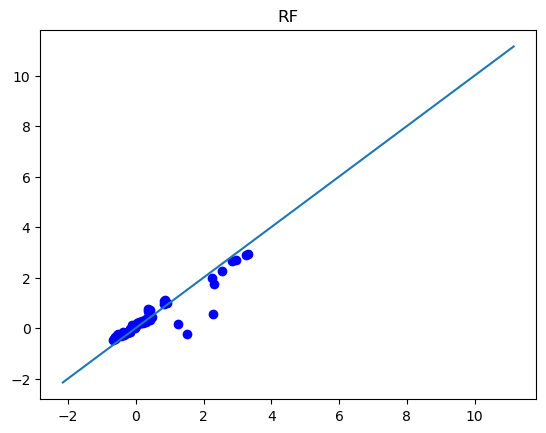

In [361]:
# Plot the graphcs
plotGraph(pred_v_act_val2['Val'], pred_v_act_val2['rf'], "RF")

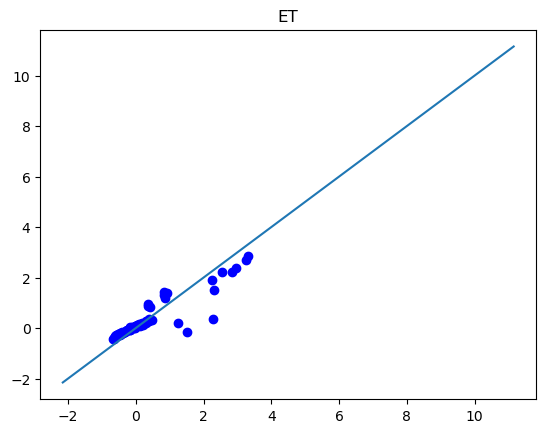

In [362]:
plotGraph(pred_v_act_val2['Val'], pred_v_act_val2['et'], "ET")

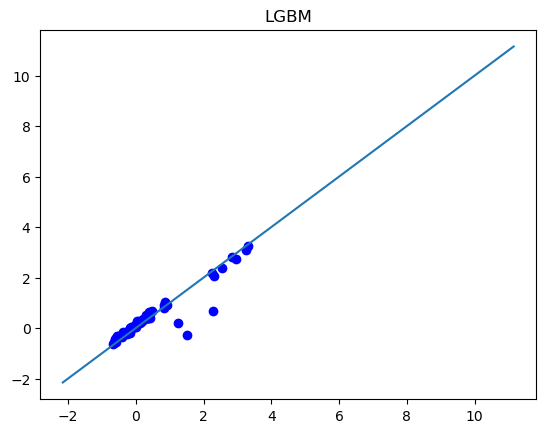

In [363]:
plotGraph(pred_v_act_val2['Val'], pred_v_act_val2['lg'], "LGBM")

In [ ]:
# Second more tuned models not as good as 1st tuned models for RF and ET
# Second more tuned model better for LGBM

In [365]:
# Do final calculations on best tuned models on test set
# Generate predictions for each model
pred_v_act_test = pd.DataFrame({'Test':Y_test.values})
#Create validation samples
pred_v_act_test['rf'] = grid_search_rf.predict(X_test)
pred_v_act_test['et'] = grid_search_et.predict(X_test)
pred_v_act_test['lg'] = grid_search_lg2.predict(X_test)

In [366]:

print ("Random forest RSME: "+ str(mean_squared_error(pred_v_act_test['Test'], pred_v_act_test['rf'],squared=False)))
print ("Extra Trees RSME: "+ str(mean_squared_error(pred_v_act_test['Test'], pred_v_act_test['et'],squared=False)))
print ("Light GBM RSME: "+ str(mean_squared_error(pred_v_act_test['Test'], pred_v_act_test['lg'],squared=False)))


print ("Random forest R2: "+ str(r2_score(pred_v_act_test['Test'], pred_v_act_test['rf'])))
print ("Extra Trees R2: "+ str(r2_score(pred_v_act_test['Test'], pred_v_act_test['et'])))
print ("Light GBM R2: "+ str(r2_score(pred_v_act_test['Test'], pred_v_act_test['lg'])))


Random forest RSME: 0.41830873022175796
Extra Trees RSME: 0.40013739235482276
Light GBM RSME: 0.39587228718919354
Random forest R2: 0.8327098970666585
Extra Trees R2: 0.846928384233924
Light GBM R2: 0.8501742046251133


In [374]:
# Now look at shap
import shap
## Workaround for legacy numpy as np.bool and np.int no longer exist
import numpy as np
np.bool = np.bool_
np.int = np.int_

In [393]:
# Fits the explainer
explainer_rf = shap.Explainer(grid_search_rf.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values_rf = explainer_rf(X_test)
# Fits the explainer
explainer_et = shap.Explainer(grid_search_et.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values_et = explainer_et(X_test)
# Fits the explainer
explainer_lg = shap.Explainer(grid_search_lg2.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values_lg = explainer_lg(X_test)

Exact explainer: 211it [00:23,  5.15it/s]                                       
Exact explainer: 211it [00:26,  4.88it/s]                                       


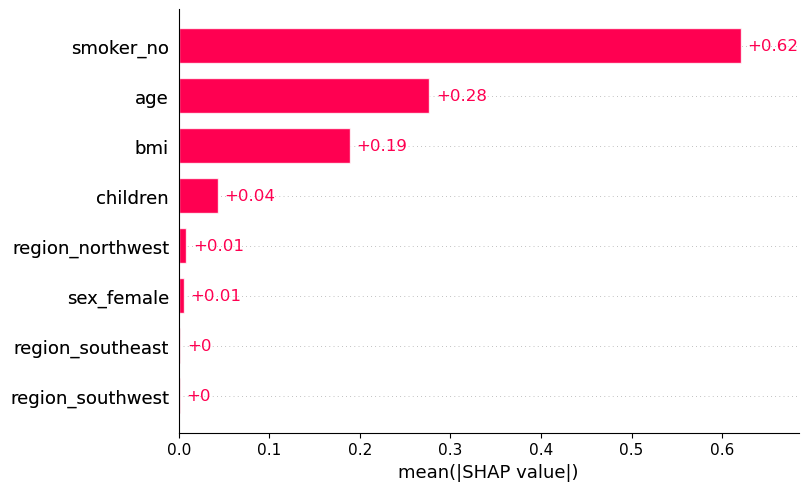

In [376]:
# Print bar plot
shap.plots.bar(shap_values_rf)

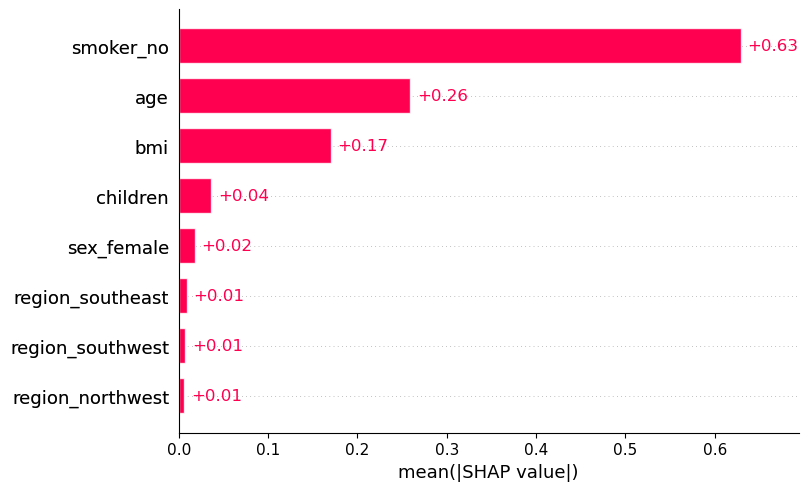

In [377]:
shap.plots.bar(shap_values_et)

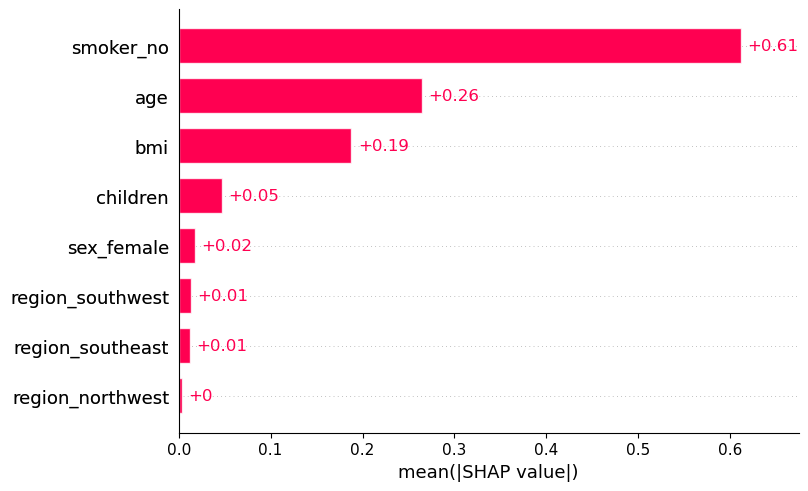

In [378]:
shap.plots.bar(shap_values_lg)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


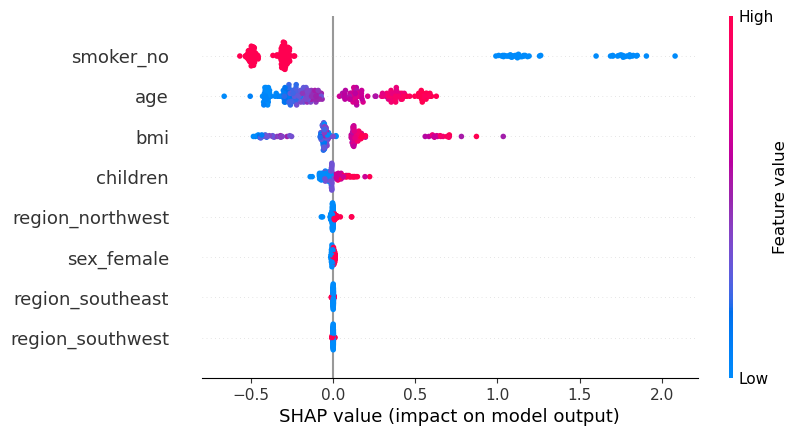

In [413]:
# We see similar features demonstrate what may impact charges
# Let's look at direction of shap values 
shap.plots.beeswarm(shap_values_rf)

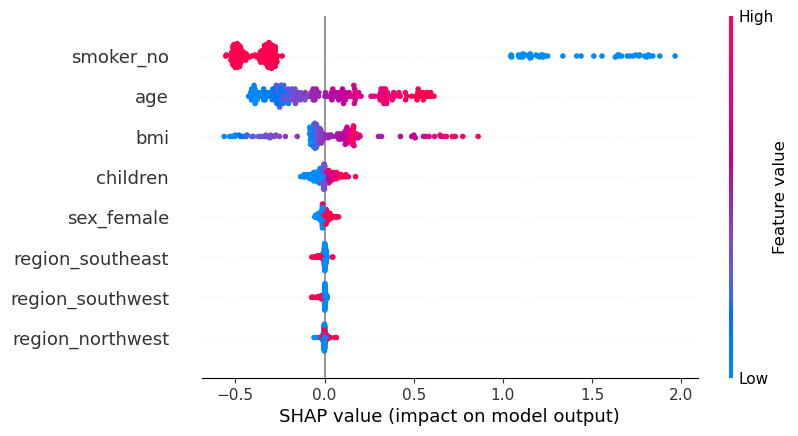

In [414]:
shap.plots.beeswarm(shap_values_et)

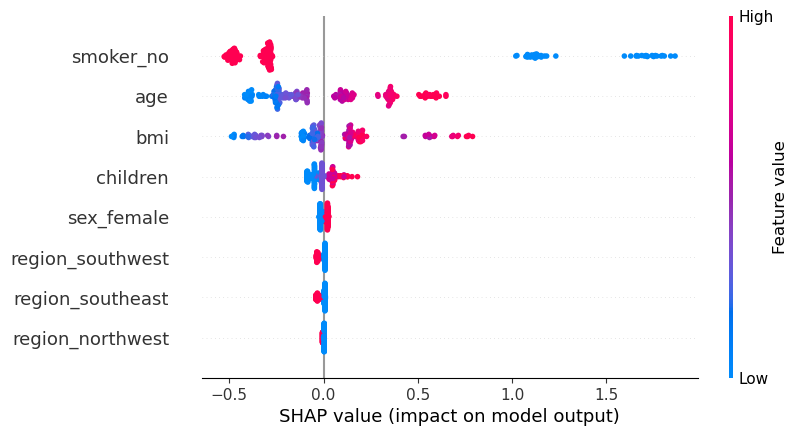

In [415]:
shap.plots.beeswarm(shap_values_lg)

In [ ]:
# Looks like Not smoking has a negative impact on charges while age and BMI have a positive impact on charges
# Impact looks good on all models

In [418]:
# This is the part where we would save the model 
# save the model to disk
import pickle
import datetime

# Filenames
filerf = 'random_forest_{:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
fileet = 'extra_trees_{:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
filelg = 'light_gbm_{:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())

pickle.dump(grid_search_rf, open(filerf, 'wb'))
pickle.dump(grid_search_et, open(fileet, 'wb'))
pickle.dump(grid_search_lg2, open(filelg, 'wb'))

Summary: We investigated what features maybe impacting medical charges. We found through modeling a strong correlative assumption between not smoking and charges as well as age and bmi to charges.  Smoking, age, and bmi had an increase in charges with SHAP values demonstrating the importance of these features.